# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
* Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [26]:
#Your code here
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df=pd.read_csv('nashville-meetup/group-edges.csv')
df.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [27]:
#Your code here
df2=pd.read_csv('nashville-meetup/meta-groups.csv')
df2.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [28]:
#Your code here
group_dict = dict(zip(df2.group_id, df2.group_name))
G = nx.Graph()
for row in df.index:
    source = group_dict[df.group1[row]]
    target = group_dict[df.group2[row]]
    weight = df.weight[row]
    G.add_edge(source, target, weight=weight)

## Visualize the Network

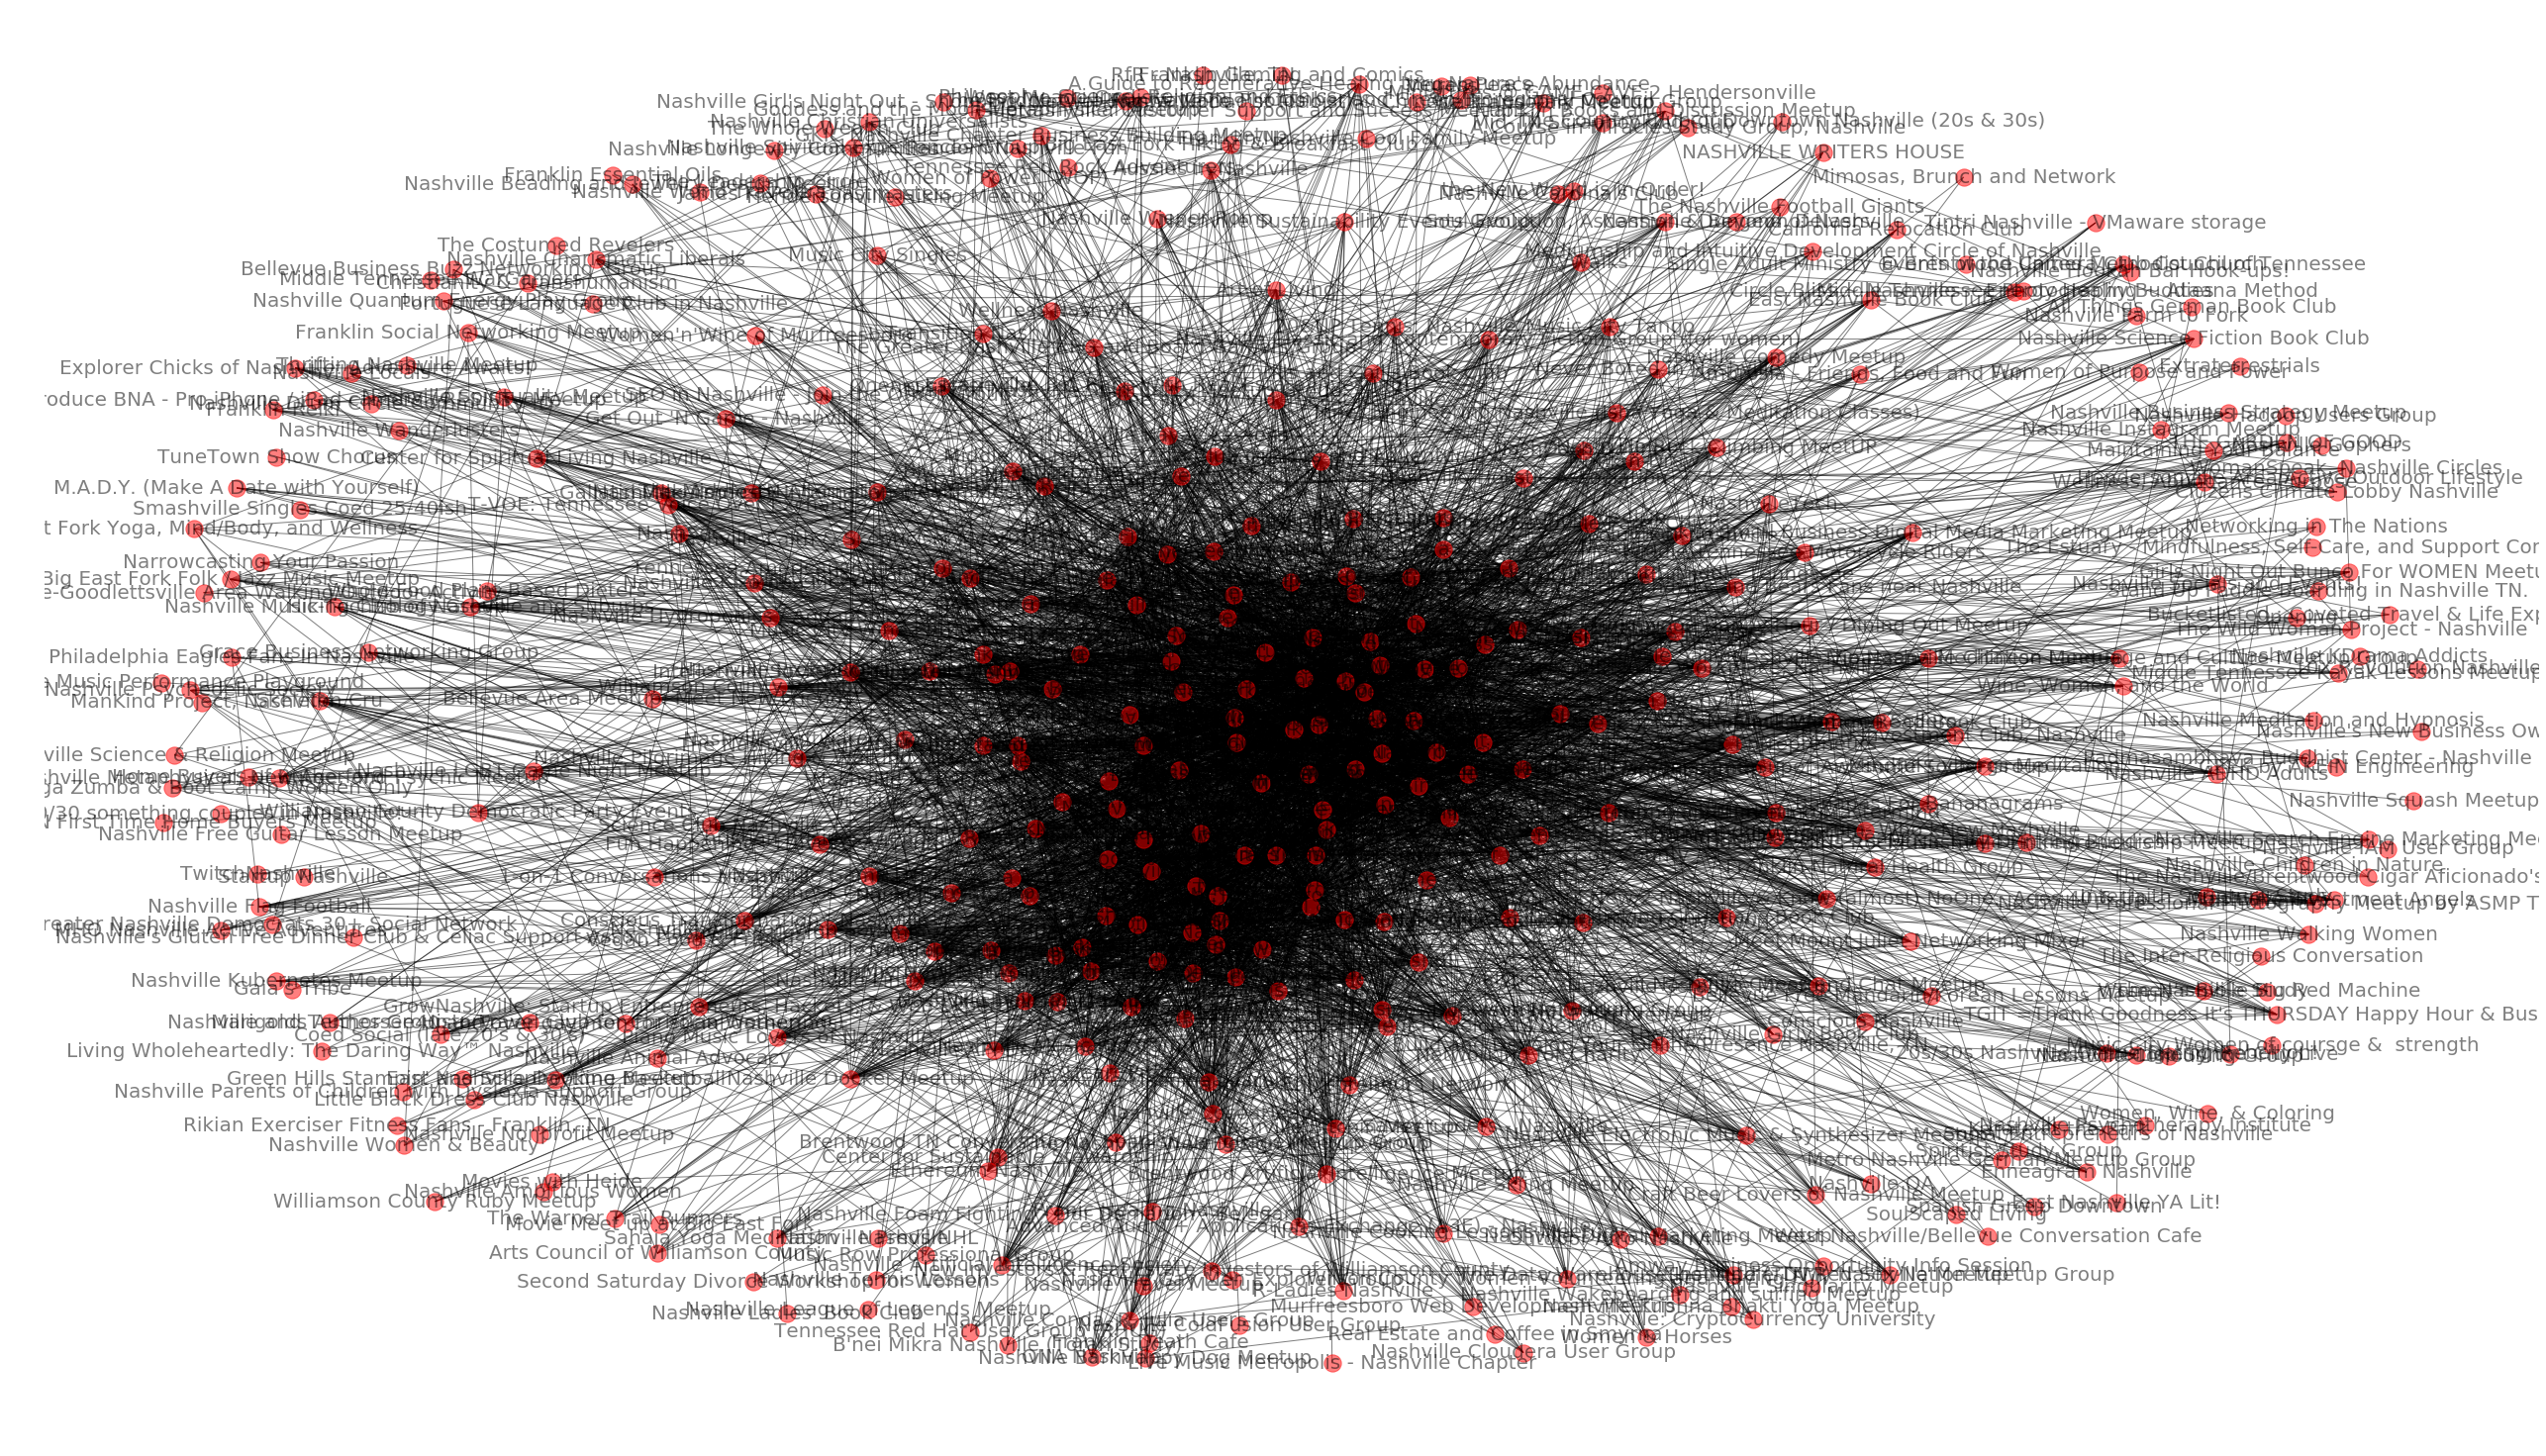

In [29]:
#Your code here
plt.figure(figsize=(35,20))
nx.draw(G,with_labels=True,alpha=.5,pos=nx.spring_layout(G, seed=10,k=1),font_size=20)

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

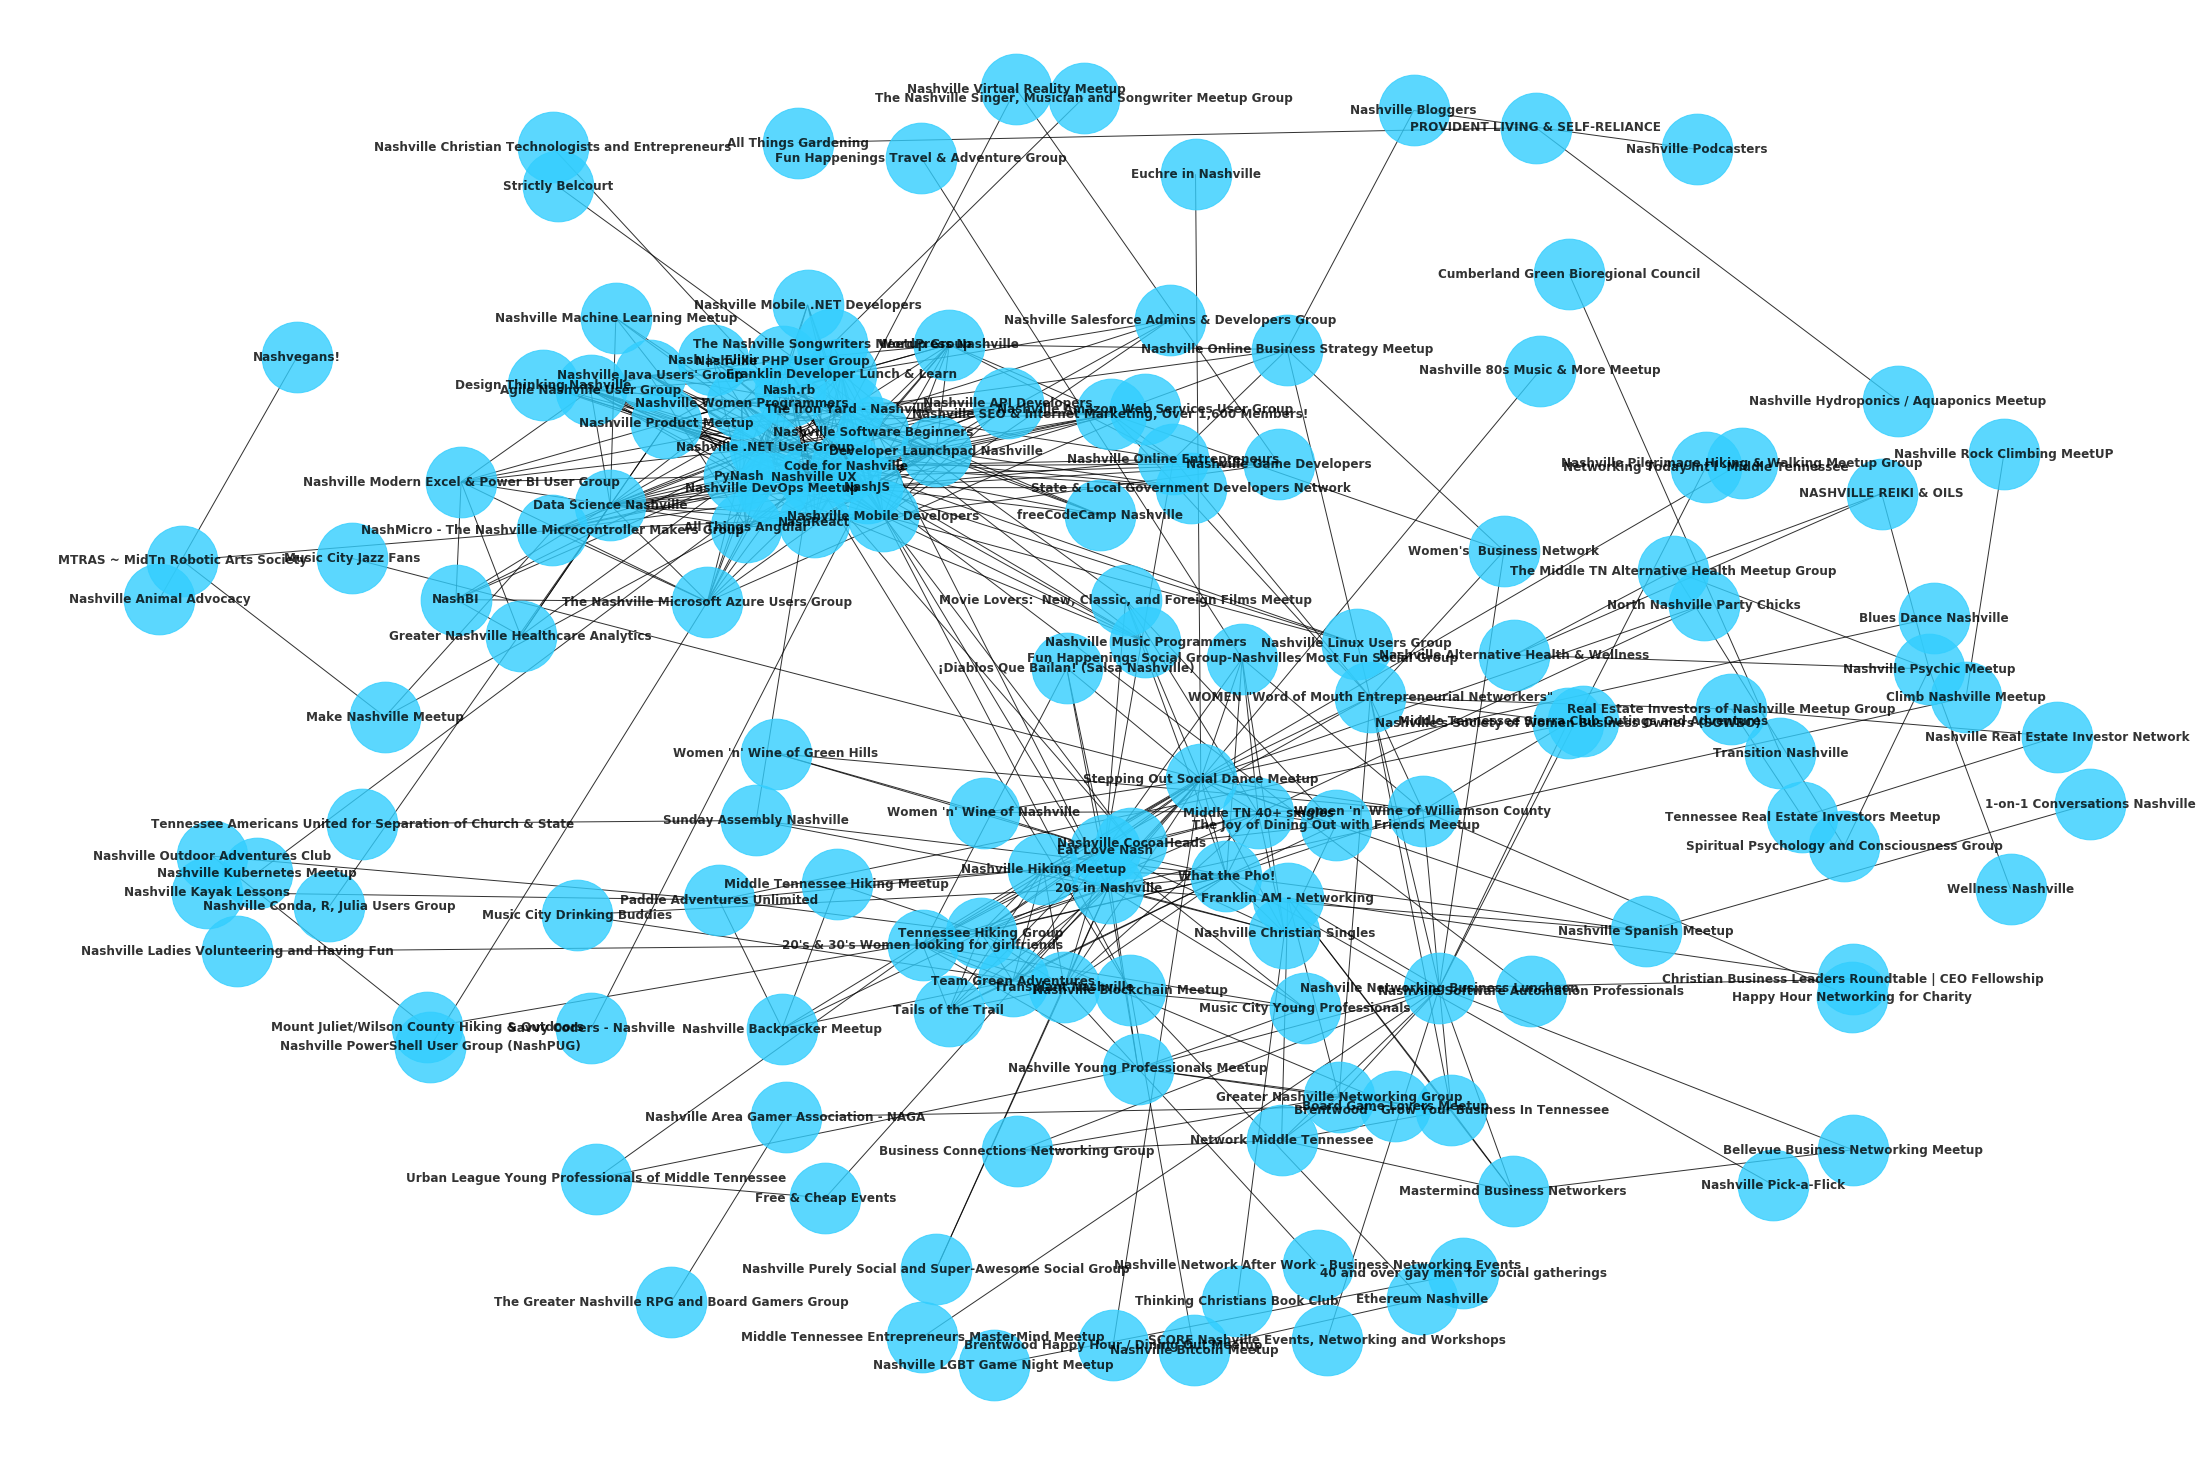

In [30]:
#Your code here
thresh=5
G_thresh = nx.Graph()
for row in df.index:
    source = group_dict[df.group1[row]]
    target = group_dict[df.group2[row]]
    weight = df.weight[row]
    if weight > thresh:
        G_thresh.add_edge(source, target, weight=weight)
plt.figure(figsize=(30,20))
nx.draw(G_thresh, pos=nx.spring_layout(G_thresh, k=1, seed=10),
        alpha=.8, node_color="#32cefe", node_size=5000,
        with_labels=True, font_size=12, font_weight="bold")

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [31]:
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_thresh))
#for n, clusters in enumerate(gn_clusters):
#    print("After removing {} edges, there are {} clusters.".format(n, len(clusters)))

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

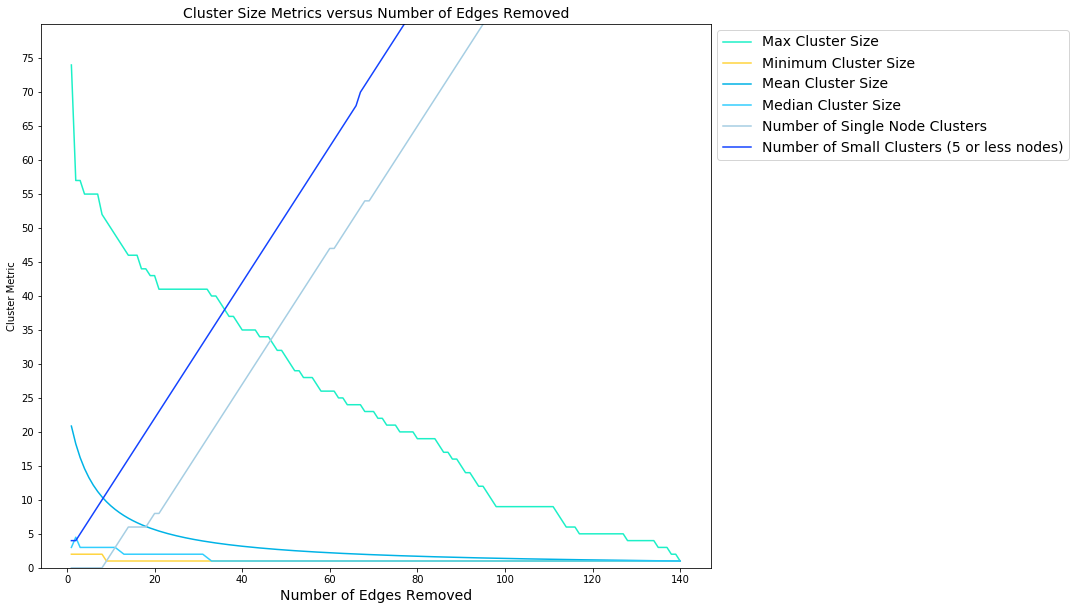

In [33]:
#Your code here
#c=list(nx.algorithms.community.k_clique_communities(G_thresh,k=4))
y = [len(cluster) for cluster in gn_clusters]
x = [n+1 for n in range(len(gn_clusters))]
import numpy as np
colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
fig = plt.figure(figsize=(12,10))
max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')
min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

In [35]:
#Your code here
# Frankly I am a bit confused about what we are trying to accomplish with this exercise
# The graph of the network in the solution seems pretty useless as there is way too much data

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               